# Tutorial Geospatial Data

## Part #2 Geometries and Spatial Relationships

In this chapter you learn how to create a GeoDataFrame. Another aspect of geospatial data is how they relate to each other in space. Thus, you will learn the different spatial relationships, and how to use them in Python to query the data or to perform spatial joins.

### Construct a GeoDataFrame from a DataFrame

You can construct a GeoDataFrame from a DataFrame as long as you have the required pieces in place: a geometry column and the Coordinate Reference System (CRS).

To create a geometry column, first build a represenation of the geometry and then use a specific constructor from the geometry module in the Shapely package. **Shapely** is a Python package that provides methods for creating and working with points, lines and polygons.

In [1]:
# import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# import geospatial libraries
import geopandas as gpd
from shapely.geometry import Point

Let's use a new dataset with restaurants in Berlin:

In [2]:
restaurants = pd.read_csv('Data/Cleansed_Data/Berlin_Restaurants')
restaurants.head(2)

,id,lat,lng,name,subCategory
0,91911,52.517114,13.46176,Casablanca,Falafel Restaurant
1,91920,52.506012,13.32805,Hotel Savoy Berlin,Hotel


In [3]:
type(restaurants)

pandas.core.frame.DataFrame

*(This dataset is sourced from [tour-pedia](http://tour-pedia.org/about/datasets.html).)*

***Creating a Geometry***

Next, let's create a Point Geometry Series. <br> The lambda function we apply combines longitude and latitude to create a tuple and then constructs a Point Geometry from the tuple. A different way to create a geometry using `zip` is also provided:

In [4]:
# create a point geometry Series: option 1
geometry = restaurants.apply(lambda x: Point((x.lng, x.lat)), axis=1)

# option 2
#geometry = [Point(xy) for xy in zip(restaurants['lng'], restaurants['lat'])]

Now that we have our geometry Series, the DataFrame is ready to be used as a GeoDataFrame. 

***Creating a GeoDataFrame***

To construct a GeoDataFrame, we use the GeoDataFrame constructor, passing it 
- the `restaurants` DataFrame, 
- the `crs` to use and 
- the `geometry` to use. 

Here we create an object called `crs` and set it to use the *EPSG:4326* CRS. We specify the geometry Series we just created as the new GeoDataFrame's `geometry` column:

In [5]:
crs = {'init':'epsg:4326'}
restaurants_geodf = gpd.GeoDataFrame(restaurants, crs=crs, geometry=geometry)
restaurants_geodf.head(2)

,id,lat,lng,name,subCategory,geometry
0,91911,52.517114,13.46176,Casablanca,Falafel Restaurant,POINT (13.46175956167 52.51711388739101)
1,91920,52.506012,13.32805,Hotel Savoy Berlin,Hotel,POINT (13.32805032307 52.506011569827)


In [6]:
type(restaurants_geodf)

geopandas.geodataframe.GeoDataFrame

Comparing both dataframes, we see it's almost identical, only the datatype has changed from a DataFrame to a GeoDataFrame, and the `geometry` column is added.

***Converting the CRS***

Notice that the GeoDataFrame's geometry uses decimal degrees to measure distances from the reference points. Remembering the last tutorial, we can convert the geometry - to measure distance in meters - using the `.to_crs()` method. 

Let's convert the crs to *EPSG:3857* with the resulting measurements in meters. 

Note that the original latitude and longitude columns remain in decimal degree units. `.to_crs()` only changes the geometry column.

In [7]:
# convert geometry from decimal degrees to meters
restaurants_geodf.geometry = restaurants_geodf.geometry.to_crs(epsg=3857)
restaurants_geodf[10:16]

,id,lat,lng,name,subCategory,geometry
10,92052,52.502578,13.416510,KuchenKaiser,German Restaurant,POINT (1493519.066988837 6891513.247496091)
11,92056,52.477287,13.320738,Straßenbahn,Pub,POINT (1482857.806712955 6886889.374957205)
12,92060,52.490184,13.353222,Tee Tea Thé,Tea Room,POINT (1486473.873489538 6889246.948290107)
13,92064,52.498880,13.446037,FABRIK-CAFÉ,Café,POINT (1496805.992027516 6890836.920768892)
14,92079,52.504206,13.417475,Die Henne,German Restaurant,POINT (1493626.46246758 6891810.82448681)
15,92083,52.523604,13.306436,Pasticceria e Rosticceria Italiana,Café,POINT (1481265.710321542 6895359.091989944)


***Accessing the Geometry***

Let's extract values of the geometry column using the `.loc` attribute of a dataframe:

In [8]:
kuchen_kaiser = restaurants_geodf.loc[10, 'geometry']
tee_tea = restaurants_geodf.loc[12, 'geometry']
die_henne = restaurants_geodf.loc[14, 'geometry']

If we print this value, we can see that it's a Point geometry:

In [9]:
print(kuchen_kaiser)

POINT (1493519.066988837 6891513.247496091)


And when checking the type of this value, we see it's a Shapely Point object:

In [10]:
type(kuchen_kaiser)

shapely.geometry.point.Point

The geometry column in a GeoDataFrame thus consists of Shapely objects!

***Creating a Geometry Manually***

But geometries can also created manually. Here we create a Point geometry for the Brandenburg Gate with coordinates 13.377704 (longitude) and 52.516275 (latitude):

In [30]:
# Python order: long, lat
brandenburg_gate = Point(13.377704, 52.516275)
print(brandenburg_gate)

POINT (13.377704 52.516275)


Always keep in mind that longitude is limited to the range -180 to 180, while latitude is limited to the range -90 to 90.
![](Pics/globe.png)

### GeoSeries Attributes and Methods

Now we'll explore the attributes and methods of a GeoPandas GeoSeries, which you can think of as a geometry column of the GeoDataFrame:

In [14]:
berlin_districs = gpd.read_file('Data/Cleansed_Data/Berlin_Districts.shp')
berlin_districs.head(2)

,OBJECTID,DISTRICT,Shape__Are,Shape__Len,POPULATION,geometry
0,1,Reinickendorf,2.416586e+08,85589.289316,263920,"POLYGON ((13.3207443281765 52.6265990635925, 1..."
1,2,Charlottenburg-Wilmersdorf,1.742738e+08,71785.131858,338923,"POLYGON ((13.3211096415616 52.5244629906886, 1..."


In [15]:
type(berlin_districs.geometry)

geopandas.geoseries.GeoSeries

GeoPandas inherits a number of useful methods and attributes from the Shapely package. The **area attribute** for example returns the calculated area of a geometry:

In [16]:
berlin_districs.geometry.area

0     0.011846
1     0.008561
2     0.022161
3     0.013689
4     0.005938
5     0.006902
6     0.008184
7     0.012165
8     0.013552
9     0.005218
10    0.002700
11    0.007011
dtype: float64

Let's print the sorted areas:

In [23]:
# calculate area of each district
district_area = berlin_districs.geometry.area

# print the areas and crs used
print(district_area.sort_values(ascending=False))
print(berlin_districs.crs)

2     0.022161
3     0.013689
8     0.013552
7     0.012165
0     0.011846
1     0.008561
6     0.008184
11    0.007011
5     0.006902
4     0.005938
9     0.005218
10    0.002700
dtype: float64
{'init': 'epsg:4326'}


The third row (with index 2) is the largest district. Recall that the distance unit for a geometry is dependent on its *Coordinate Reference System (CRS)*. The CRS for the Berlin districts data is *epsg 4326* which uses decimal degrees for distance. So the area units here are decimal degrees squared.

Let's find the area in a way that's a little more comprehensible to us: kilometers squared. We can change the CRS to one that uses meters for distance: *epsg 3857* using `.to_crs()` and then convert meters^2 to kilometers^2:

In [25]:
# create a copy of berlin_districts that uses EPSG:3857
berlin_districts_3857 = berlin_districs.to_crs(epsg=3857)

# define a variable for m^2 to km^2
sqm_to_sqkm = 10**6

# get area in kilometers squared
district_area_km = berlin_districts_3857.geometry.area / sqm_to_sqkm
print(district_area_km.sort_values(ascending=False))
print(berlin_districts_3857.crs)

2     450.397219
3     279.266143
8     275.457357
7     247.776994
0     241.658604
1     174.273771
6     166.680203
11    142.522777
5     140.619878
4     120.712189
9     106.288207
10     54.961010
dtype: float64
{'init': 'epsg:3857', 'no_defs': True}


The **centroid method** returns the point at the center of each geometry in a GeoSeries:

In [27]:
# centroid of first polygon
print(berlin_districs.geometry.centroid[0])

POINT (13.29133831905174 52.59568176222349)


... which could also be stored in a new column:

In [33]:
# create center column from the centroid
berlin_districs['center'] = berlin_districs.geometry.centroid

berlin_districs.head(2)

,OBJECTID,DISTRICT,Shape__Are,Shape__Len,POPULATION,geometry,center
0,1,Reinickendorf,2.416586e+08,85589.289316,263920,"POLYGON ((13.3207443281765 52.6265990635925, 1...",POINT (13.29133831905174 52.59568176222349)
1,2,Charlottenburg-Wilmersdorf,1.742738e+08,71785.131858,338923,"POLYGON ((13.3211096415616 52.5244629906886, 1...",POINT (13.27023027540493 52.50104015156788)
2,3,Treptow-Köpenick,4.503972e+08,149810.619914,267167,"POLYGON ((13.5792539458089 52.3908302513483, 1...",POINT (13.61121776734134 52.42958541340812)
3,4,Pankow,2.792661e+08,109210.896203,404534,"(POLYGON ((13.5048079665743 52.6195982101068, ...",POINT (13.44024935764394 52.59719210519483)
4,5,Neukölln,1.207122e+08,66590.293473,329767,"POLYGON ((13.4583203518438 52.4856882506131, 1...",POINT (13.45496658424389 52.44107869027926)
5,6,Lichtenberg,1.406199e+08,75961.265817,288320,"POLYGON ((13.5231622474414 52.4742418993467, 1...",POINT (13.50976339861569 52.53490863716018)
6,7,Marzahn-Hellersdorf,1.666802e+08,67457.607608,267452,"POLYGON ((13.6131722225913 52.4721329895958, 1...",POINT (13.57883325742723 52.52112030601902)
7,8,Spandau,2.477770e+08,100052.537728,241905,"POLYGON ((13.231191375419 52.5612351042813, 13...",POINT (13.17882220423255 52.52579796277733)
8,9,Steglitz-Zehlendorf,2.754574e+08,103050.006867,307088,"POLYGON ((13.3195245310051 52.4669887925436, 1...",POINT (13.23907579845156 52.43484357326309)
9,10,Mitte,1.062882e+08,58707.772351,379610,"POLYGON ((13.3772116516902 52.5609060360395, 1...",POINT (13.36590121143018 52.53287523413531)


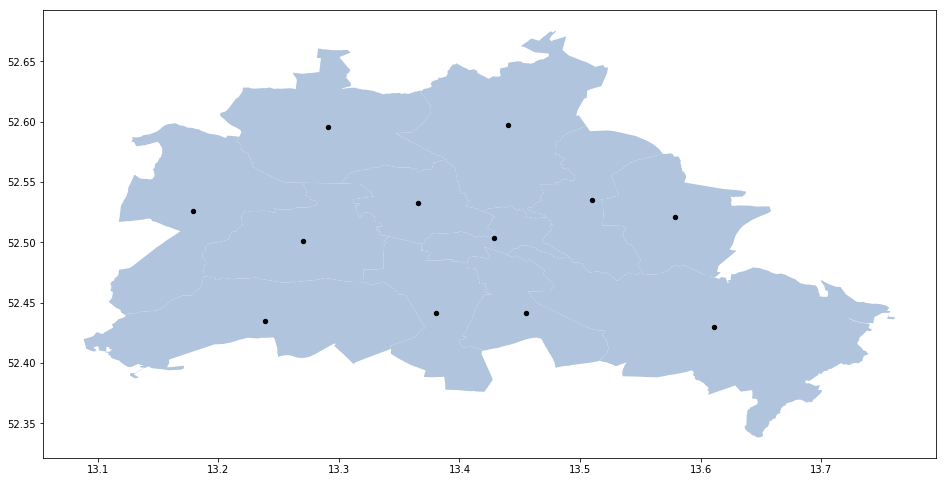

In [65]:
# store the centroids in a GeoSeries
berlin_centroids = berlin_districs.geometry.centroid

# plot districts as ax and add the centroids
ax = berlin_districs.plot(color='lightsteelblue', figsize=(16,16))
berlin_centers.plot(ax=ax, color='black', markersize=19)

# show the plot
plt.show()

The **distance method** of a GeoSeries finds the minimum distance from the geometry it is called on to a geometry passed in as an argument:

In [35]:
# defining centroid of Mitte
centroid_mitte = berlin_districts_3857.geometry.centroid[9]

# distance from brandenburg_gate to centroid of Mitte
brandenburg_gate.distance(other=centroid_mitte)

7055667.0846656505

The distance unit depend on the CRS which is epsg 3857 in our case, i.e. measured in meters.

### Spatial Relationships within a GeoSeries

Shapely also allows us to explore spatial **relationships** between individual geometries.

Imagine, we've created polygons for each district in Berlin:

In [51]:
reinickendorf = berlin_districs.loc[0, 'geometry']
char_wilm = berlin_districs.loc[1, 'geometry']
trep_koep = berlin_districs.loc[2, 'geometry']
pankow = berlin_districs.loc[3, 'geometry']
neukoelln = berlin_districs.loc[4, 'geometry']
lichtenberg = berlin_districs.loc[5, 'geometry']
marz_heller = berlin_districs.loc[6, 'geometry']
spandau = berlin_districs.loc[7, 'geometry']
steg_zehl = berlin_districs.loc[8, 'geometry']
mitte = berlin_districs.loc[9, 'geometry']
fried_kreuz = berlin_districs.loc[10, 'geometry']
temp_schoen = berlin_districs.loc[11, 'geometry']

Since Shapely has no method to visualize multiple geometries, we quickly put some of our geometries in a GeoSeries and plot that:

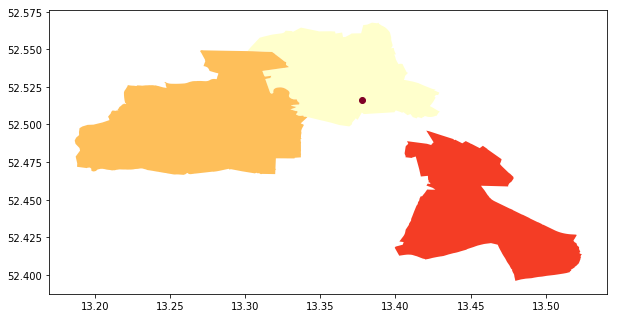

In [52]:
gpd.GeoSeries([mitte, char_wilm, neukoelln, brandenburg_gate]).plot(cmap='YlOrRd', figsize=(10,8));

- We see that the Brandenburg Gate is located in the Mitte district (in bright yellow). 

- Mitte (in bright yellow) and Charlottenburg (in dark yellow) are neighbors, while Mitte (in bright yellow) and Neukölln (in bright red) are not.

Now let's try methods that translate what we've just seen into code:

In [53]:
# contains-method to check whether Mitte contains the famous landmark
mitte.contains(brandenburg_gate)

True

In [54]:
# contains-method to check whether Neukölln contains the famous landmark
neukoelln.contains(brandenburg_gate)

False

In [55]:
# now the same with the within-method --> the order changes!
brandenburg_gate.within(mitte)

True

In [56]:
# touches-method
mitte.touches(char_wilm)

True

### Spatial Relationships in GeoPandas

We just learned about certain spatial relationships between two individual geometry objects. The GeoDataFrame yet has similar methods to apply to *all* of its geometries.

In the next example, we're checking which restaurants are within the polygon of the Mitte district. To perform this operation, we need to make sure both data is using the same Coordinate Reference System (CRS):

In [59]:
restaurants_geodf.crs

{'init': 'epsg:3857', 'no_defs': True}

In [60]:
berlin_districs.crs

{'init': 'epsg:4326'}

In [61]:
# convert restaurants geometry to epsg 4326 (from meters to decimal degrees)
restaurants_geodf.geometry = restaurants_geodf.geometry.to_crs(epsg=4326)
restaurants_geodf.crs

{'init': 'epsg:4326', 'no_defs': True}

In [62]:
# checking which restaurants are within the polygon of Mitte
restaurants_geodf.within(mitte).tail()

3976     True
3977    False
3978    False
3979    False
3980    False
dtype: bool

The result of this operation is a Boolean Series that can directly be used as a mask to filter the original dataframe:

In [63]:
mitte_restaurants = restaurants_geodf[restaurants_geodf.within(mitte)]
mitte_restaurants.shape[0]

477

For our dataset, there are 477 restaurants located in Mitte.

### Spatial Joins

It would be interesting to know for each restaurant in which district it is located in. Unfortunately, the districts' names are in another GeoDataFrame. So we need to combine - or: join - both datasets. Joining on location is called a *spatial join'.

To spatially join two GeoDataFrames, GeoPandas provides the `.sjoin()` method. It takes an argument `op` which is short for operation to specify the type of spatial join:

```python
gpd.sjoin(first_gdf, second_gdf, op = <operation>)
```

- The first_gdf is the GeoDataFrame we want to add information to. 
- The second_gdf is the GeoDataFrame that contains the information we want to add. 

*Note, that you need to make sure both GeoDataFrames use the same CRS before you join them!*

- Finally we specify which spatial operation we want to use. The operation can be one of three types: *intersects*, *contains*, or *within*

We use *within* as we want GeoPandas check whether or not rows in the restaurants dataset (left GeoDataFrame) are within the rows of the districts dataset(right GeoDataFrame). Note how the order of the arguments is important here!

In [152]:
restaurants_geodf.crs

{'init': 'epsg:4326', 'no_defs': True}

In [153]:
berlin_districs.crs

{'init': 'epsg:4326'}

In [154]:
joined = gpd.sjoin(restaurants_geodf, berlin_districs, op = 'within')
joined.head(3)

,id,lat,lng,name,subCategory,geometry,index_right,OBJECTID,DISTRICT,Shape__Are,Shape__Len,POPULATION
0,91911,52.517114,13.461760,Casablanca,Falafel Restaurant,POINT (13.46175956166999 52.51711388739101),10,11,Friedrichshain-Kreuzberg,5.496101e+07,53758.825032,285963
2,91947,52.511193,13.449347,Upstalsboom Hotel,Hotel,POINT (13.44934701919601 52.511193329824),10,11,Friedrichshain-Kreuzberg,5.496101e+07,53758.825032,285963
5,92007,52.504890,13.385203,relexa hotel Stuttgarter Hof,Hotel,POINT (13.385203007038 52.50488973443598),10,11,Friedrichshain-Kreuzberg,5.496101e+07,53758.825032,285963


And here we've chained several functions to group, count, and sort the joined df to see how many restaurants are within each district:

In [160]:
# first subset joined df     # groupby district  # count restaurants per district # sort descending
joined[['name', 'DISTRICT']].groupby('DISTRICT').agg('count').sort_values('name', ascending=False)

,name
DISTRICT,
Mitte,477
Charlottenburg-Wilmersdorf,466
Pankow,424
Steglitz-Zehlendorf,388
Tempelhof-Schöneberg,372
Treptow-Köpenick,318
Neukölln,312
Reinickendorf,284
Friedrichshain-Kreuzberg,265


***Wanna more?***

- Read the [GeoPandas Docs](http://geopandas.org/index.html)
- Read the [Shapely Docs](https://shapely.readthedocs.io/en/stable/manual.html#)
- Read this [article](https://medium.com/@shakasom/how-to-convert-latitude-longtitude-columns-in-csv-to-geometry-column-using-python-4219d2106dea) to learn more about????